# Proyecto 4. Parte 2
## Pamela Salazar

10. Entrene la red construida utilizando su conjunto de entrenamiento

In [392]:
import pandas as pd
import numpy as np
import random
import pickle
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.metrics import metrics 
from keras.losses import CategoricalCrossentropy
from sklearn import model_selection 


In [393]:
df1_train = pd.read_csv('train.csv')
df1_test = pd.read_csv('test.csv')


In [394]:
def writeSpectogram (specfile):
    with open(specfile, "rb") as f:
        S_dB = pickle.load(f)
    S_dB=S_dB.astype(np.float32)
    return S_dB

In [399]:
D_train=[]
for i in range(len(df1_train['Clase'])):
    classID = df1_train['Clase ID'][i] 
    path_spect = 'espectogramas' + '/' + df1_train['Path de espectograma'][i]
    spec = writeSpectogram(path_spect)
    spec =spec .astype(np.float32)
    # Si no tienen tamaño uniforme no se incluye en la variable D
    #if spec.shape != (128,128):
    #    continue
    D_train.append((spec,classID))

dataset_train=D_train
#dataset_valid=D_valid
#dataset_test=D_test
random.shuffle(dataset_train)
#random.shuffle(dataset_valid)
#random.shuffle(dataset_test)
train=dataset_train
#valid=dataset_valid
#test=dataset_test
X_train, y_train = zip(*train)
#X_valid, y_valid = zip(*valid)
#X_test, y_test = zip(*test)
X_train = np.array([x.reshape( (40, 101, 1) ) for x in X_train])
#X_valid = np.array([x.reshape( (128, 128, 1) ) for x in X_valid])
#X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])
# Normalización
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
#X_valid = (X_valid - mean)/std
#X_test = (X_test - mean)/std
y_train = np.array(np_utils.to_categorical(y_train, 12))
#y_valid = np.array(keras.utils.to_categorical(y_valid, 7))
#y_test = np.array(keras.utils.to_categorical(y_test, 7))


In [400]:
# Construct model 
model = models.Sequential()
# model2 = models.Sequential()

# model
model.add(layers.Conv2D( input_shape=(40, 101, 1),filters=12, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=24, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 13), strides=(1, 1), padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='softmax'))


model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 40, 101, 12)       120       
                                                                 
 batch_normalization_30 (Bat  (None, 40, 101, 12)      48        
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 40, 101, 12)       0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 20, 51, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 20, 51, 24)        2616      
                                                                 
 batch_normalization_31 (Bat  (None, 20, 51, 24)      

Compile and train the model

In [401]:
# model 1
model.compile(optimizer=Adam(learning_rate=3e-4),
              loss=CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy(),
                       metrics.FalseNegatives()])

In [403]:
model.fit(X_train, y_train, epochs=25,batch_size=128)

Epoch 1/25
183/183 [==============================] - 25s 129ms/step - loss: 1.4557 - categorical_accuracy: 0.5301 - false_negatives_6: 13880.0000
Epoch 2/25
183/183 [==============================] - 33s 181ms/step - loss: 0.5457 - categorical_accuracy: 0.8253 - false_negatives_6: 5061.0000
Epoch 3/25
183/183 [==============================] - 36s 195ms/step - loss: 0.3593 - categorical_accuracy: 0.8852 - false_negatives_6: 3190.0000
Epoch 4/25
183/183 [==============================] - 35s 190ms/step - loss: 0.2826 - categorical_accuracy: 0.9114 - false_negatives_6: 2421.0000
Epoch 5/25
183/183 [==============================] - 35s 190ms/step - loss: 0.2313 - categorical_accuracy: 0.9287 - false_negatives_6: 1955.0000
Epoch 6/25
183/183 [==============================] - 37s 200ms/step - loss: 0.1973 - categorical_accuracy: 0.9370 - false_negatives_6: 1689.0000
Epoch 7/25
183/183 [==============================] - 39s 211ms/step - loss: 0.1696 - categorical_accuracy: 0.9473 - false_

In [404]:
model.save('model.h5')

In [410]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


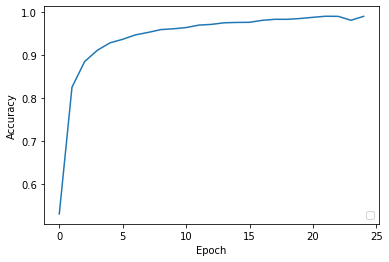

In [413]:
plt.plot(model.history.history['categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

No handles with labels found to put in legend.


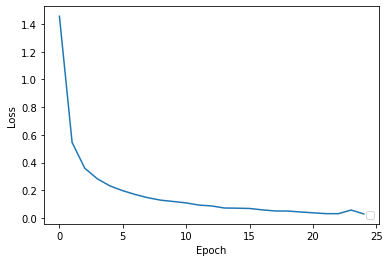

In [415]:
plt.plot(model.history.history['loss'], )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')